In [1]:

%matplotlib widget 
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
raw_data = json.load(open('awsim_car_data.json'))

In [3]:
raw_data[199]

{'SimTsUs': 638617439489376082,
 'RenderTsUs': 0,
 'Vel': {'x': 2.9162557125091553,
  'y': 0.006769842002540827,
  'z': 4.630409240722656},
 'Acc': {'x': 0.0, 'y': 0.0, 'z': 0.0},
 'Rot': {'x': 359.80029296875,
  'y': 32.59751510620117,
  'z': 0.060530178248882294},
 'Pos': {'x': -6.062350273132324,
  'y': 0.017956525087356567,
  'z': -13.97653579711914},
 'Step': 2192,
 'AngularVel': {'x': 0.06483761221170425,
  'y': -5.76883576286491e-06,
  'z': 0.07311176508665085},
 'WheeledVehicleData': {'Wheels': [{'_4wdInd': 1,
    'AngVel': 0.0003819716803263873,
    'ReqTorq': 9.999999747378752e-06,
    'ReqBreakTorq': 0.0,
    'Steer': 9.999999747378752e-06,
    'Sus': 378.9147644042969,
    'LongSlip': -0.9819563031196594,
    'LatSlip': -0.0008706851513125002},
   {'_4wdInd': 2,
    'AngVel': 0.0003819716803263873,
    'ReqTorq': 9.999999747378752e-06,
    'ReqBreakTorq': 0.0,
    'Steer': 9.999999747378752e-06,
    'Sus': 392.04937744140625,
    'LongSlip': -0.9819555282592773,
    'LatSli

In [4]:
def data_item_to_single_dict(item):
    final_dict = {}
    final_dict['time'] = item['SimTsUs']/1e6
    final_dict['velocity'] = np.array([item['Vel']['x'], item['Vel']['y'], item['Vel']['z']])
    final_dict['position'] = np.array([item['Pos']['x'], item['Pos']['y'], item['Pos']['z']])
    final_dict['rotation'] = np.array([item['Rot']['x'], item['Rot']['y'], item['Rot']['z']])
    final_dict['acceleration'] = np.array([item['Acc']['x'], item['Acc']['y'], item['Acc']['z']])
    final_dict['angular_velocity'] = np.array([item['AngularVel']['x'], item['AngularVel']['y'], item['AngularVel']['z']])
    final_dict['friction']  = item['friction']
    return final_dict

In [5]:
data_item_to_single_dict(raw_data[199])

{'time': 638617439489.3761,
 'velocity': array([2.91625571, 0.00676984, 4.63040924]),
 'position': array([ -6.06235027,   0.01795653, -13.9765358 ]),
 'rotation': array([3.59800293e+02, 3.25975151e+01, 6.05301782e-02]),
 'acceleration': array([0., 0., 0.]),
 'angular_velocity': array([ 6.48376122e-02, -5.76883576e-06,  7.31117651e-02]),
 'friction': 0.20000000298023224}

In [6]:
data = []
for item in raw_data:
    try:
        data.append(data_item_to_single_dict(item))
    except KeyError:
        print(item)

{}


In [7]:
len(data)

1116

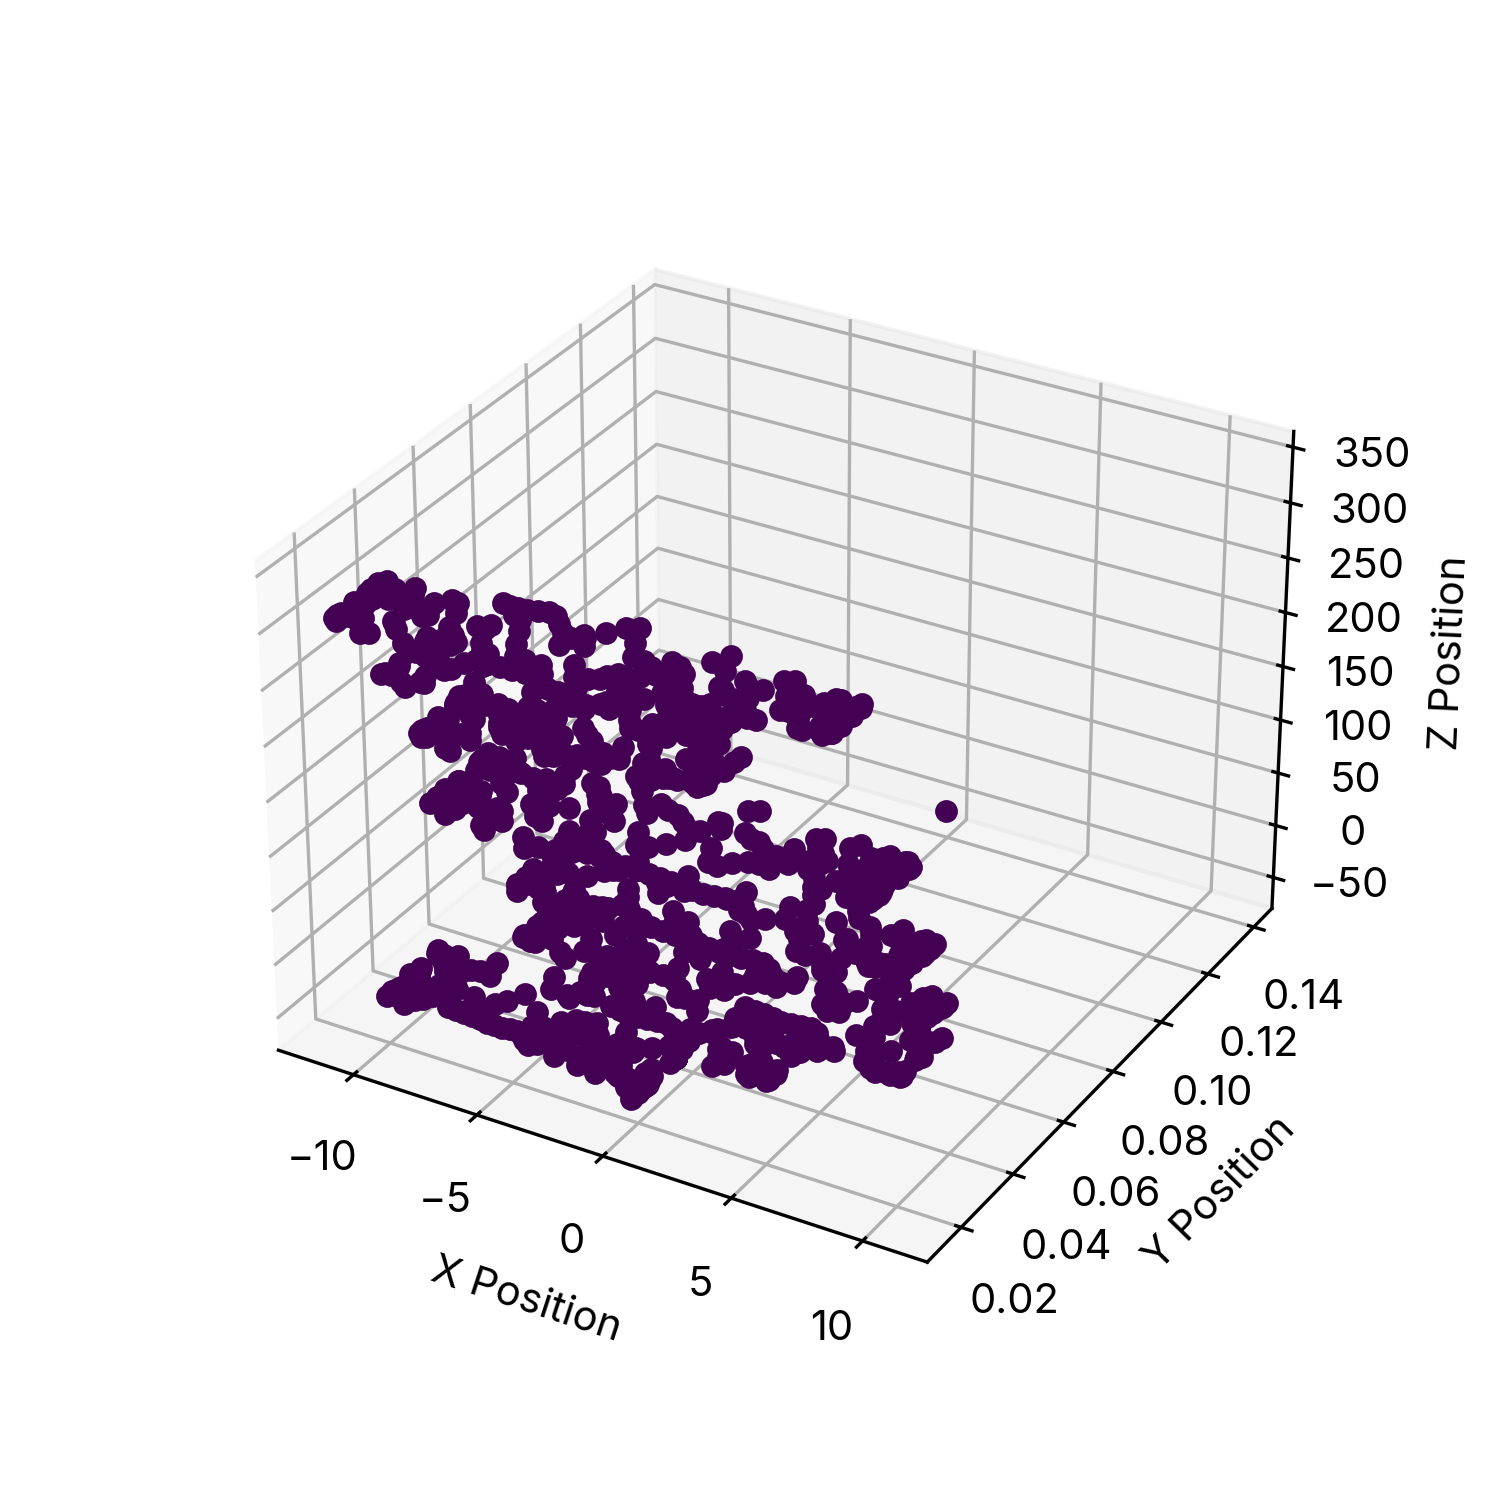

In [9]:
# Plot the x y and z positions of the car from data, colored by Friction
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
for item in data:
    ax.scatter(item['position'][0], item['position'][1], item['position'][2], c=item['friction'])
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
# Show the colorbar
plt.show()


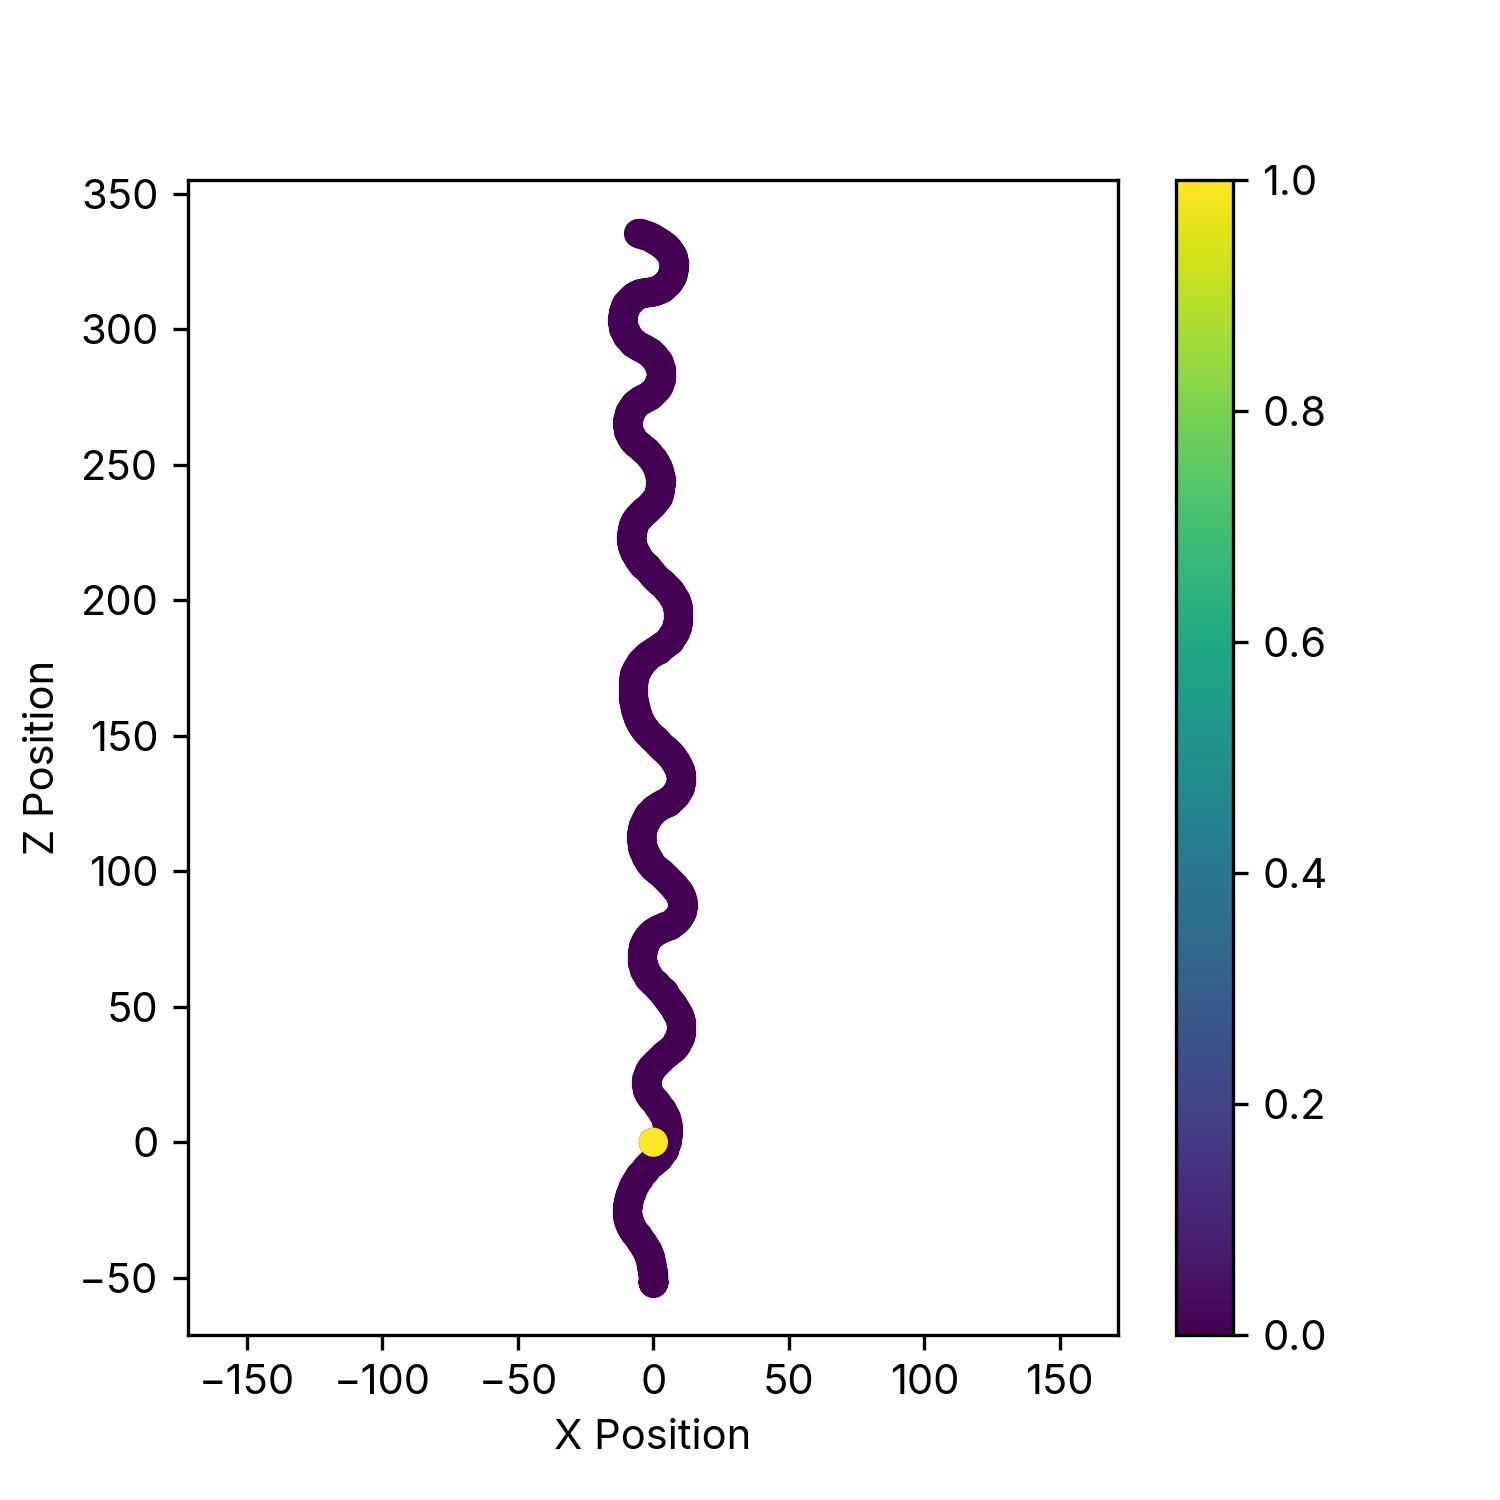

In [12]:
PL